In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
Haberman=pd.read_csv('Haberman.csv')

In [3]:
print(Haberman.shape)

(306, 4)


#Observation:
There are 306 (rows) data points and 4 (columns) features.

In [4]:
print(Haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


There are 4 columns in haberman dataset

In [5]:
Haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

#observation: 
1. Of the total 306 data points, Class 1's, 225 patients survived 5 years or longer and Class 2's, 81 patients died within 5 years . It is imbalance data set because class 1 has 225 data points and class 2 has 81 data points.

In [6]:
# Calculate the Percentage of each Class
Haberman['status'].value_counts()*100/Haberman.shape[0]

1    73.529412
2    26.470588
Name: status, dtype: float64

Observation:
1. 73.52% of patients survived 5 years or longer.
2. 26.47% of patients died within 5 years.

In [7]:
Haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Observation:
There are no missing value in the Haberman dataset

In [10]:
Haberman['status']=Haberman['status'].map({1:"Patient_Survived", 2:"Patient_died"})

Observation:
Converting integer value (1 or 2) of status to Patient_Survived and Patient_died respectively for better analysis

In [9]:
Haberman.head()

,age,year,nodes,status
0,30,64,1,Patient_Survived
1,30,62,3,Patient_Survived
2,30,65,0,Patient_Survived
3,31,59,2,Patient_Survived
4,31,65,4,Patient_Survived


In [10]:
Haberman.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Observation:
1. The minimum value of age is 30 and maximum value of age 83 with a mean of 52 years.
2. Operation Year is varied in between 1958 to 1969.
3. Nodes found in the patient body is varied between 0 to 52.
4. 75% of Patients have nodes less than 4.

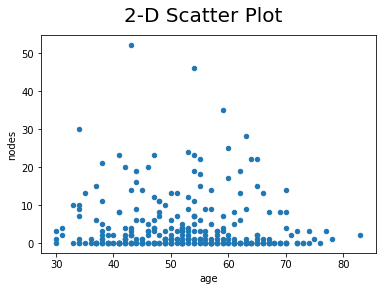

In [6]:
Haberman.plot(kind='scatter', x='age', y='nodes')
plt.suptitle('2-D Scatter Plot', fontsize=20)
plt.show()

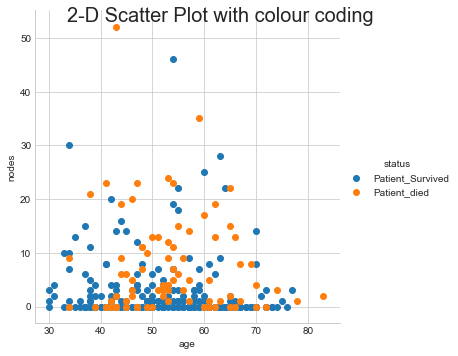

In [11]:
sns.set_style('whitegrid');
sns.FacetGrid(Haberman, hue='status', size=5)\
    .map(plt.scatter,'age','nodes') \
    .add_legend();
plt.suptitle('2-D Scatter Plot with colour coding', fontsize=20)
plt.show()

Observation:
1. Most of the patients had number of nodes near to 0.
2. More the number of nodes lesser the chance to survive e.g: if number of nodes is greater than 30 than 66% chance that a    patient died within 5 years of Operation.
3. Patient's whose operation held in between 60-70 year age had lesser chance to survive.
4. More than 90 % of Patients survived whose age is less than 40  at the time of operation.

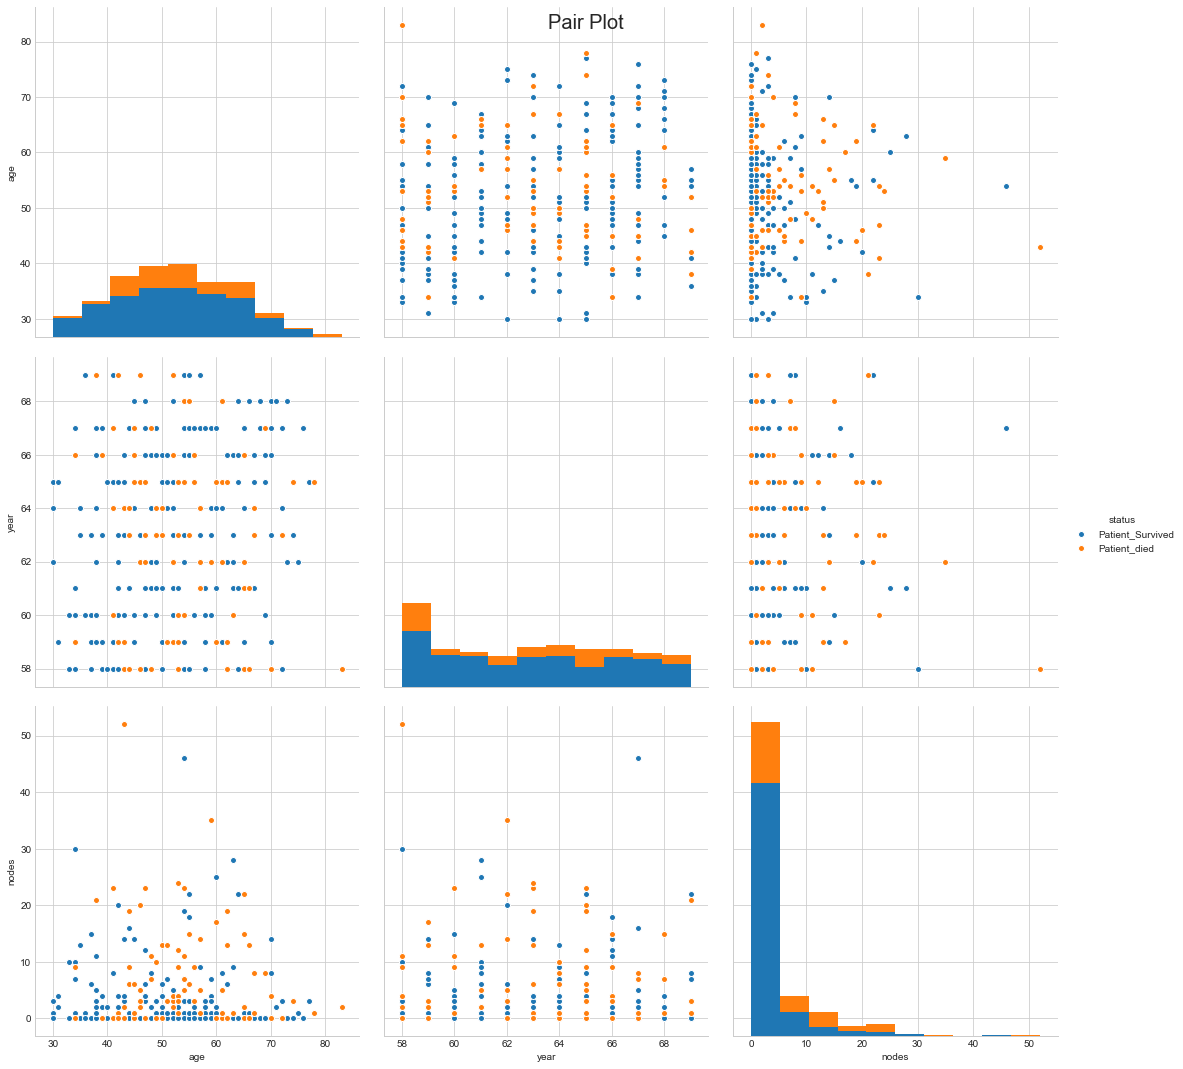

In [13]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(Haberman, hue='status',size=5);
plt.suptitle('Pair Plot', fontsize=20)
plt.show();

Observation:
1. age versus nodes plot is helpful to get the insight of data.
2. With Pair plot, we cannot distinguish the data easily because most of them are overlapping.

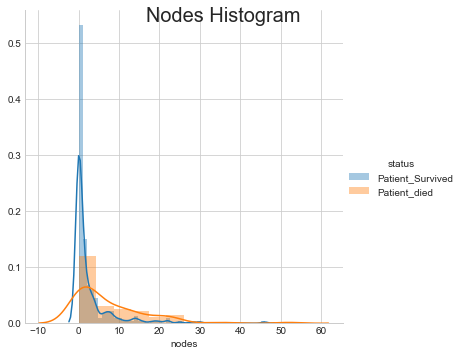

In [28]:
import warnings                              # warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(Haberman, hue='status', size=5)\
    .map(sns.distplot,'nodes') \
    .add_legend();
plt.suptitle('Nodes Histogram', fontsize=20)
plt.show();

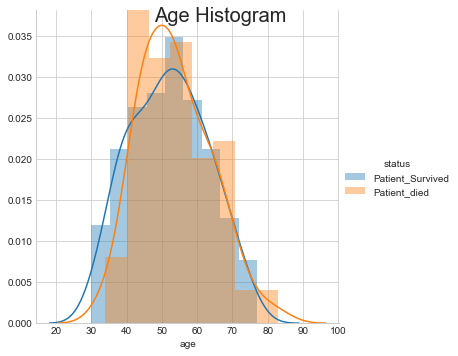

In [16]:
import warnings                              # warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(Haberman, hue='status', size=5)\
    .map(sns.distplot,'age') \
    .add_legend();
plt.suptitle('Age Histogram', fontsize=20)
plt.show();

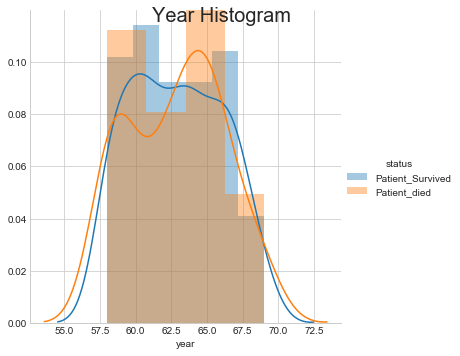

In [17]:
import warnings                              # warnings
warnings.filterwarnings("ignore")
sns.FacetGrid(Haberman, hue='status', size=5)\
    .map(sns.distplot,'year') \
    .add_legend();
plt.suptitle('Year Histogram', fontsize=20)
plt.show();

Observation:
1. From the above PDFs both age and Patient's Year of Operation are not good features for useful insights as the distribution is more similar for both people who survived and also dead.
2. number of nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions of both Classes.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


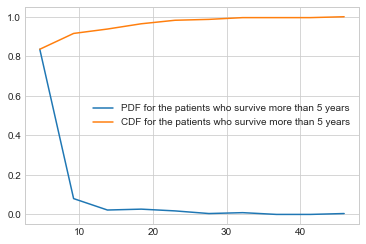

In [18]:
Patient_Survived =Haberman.loc[Haberman["status"]=="Patient_Survived"]

counts, bin_edges=np.histogram(Patient_Survived['nodes'] , bins=10, density=True)

pdf =counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF for the patients who survive more than 5 years', 'CDF for the patients who survive more than 5 years'])
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


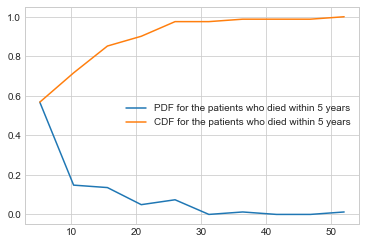

In [20]:
Patient_died=Haberman.loc[Haberman["status"]=="Patient_died"]
counts, bin_edges=np.histogram(Patient_died['nodes'] , bins=10, density=True)

pdf =counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['PDF for the patients who died within 5 years', 'CDF for the patients who died within 5 years'])
plt.show();

Mean, Standard Deviation, Median, Percentile, Quantile, IOQ and MAD

In [48]:
print("\nMeans:")
print(np.mean(Patient_Survived["nodes"]))
print(np.mean(Patient_died["nodes"]))

print("\nStandard Deviation:")
print(np.std(Patient_Survived["nodes"]))
print(np.std(Patient_died["nodes"]))

print("\nMedians:")
print(np.median(Patient_Survived["nodes"]))
print(np.median(Patient_died["nodes"]))

print("\nQuantiles:")
print(np.percentile(Patient_Survived["nodes"],np.arange(0,100,25)))
print(np.percentile(Patient_died["nodes"],np.arange(0,100,25)))

print("\n90th Percentiles:")
print(np.percentile(Patient_Survived["nodes"],90))
print(np.percentile(Patient_died["nodes"], 90))

from statsmodels import robust
print("\nMedian Absolute Deviation")
print(robust.mad(Patient_Survived["nodes"]))
print(robust.mad(Patient_died["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Standard Deviation:
5.857258449412131
9.128776076761632

Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Observations:
1. 90% of the patients who survived had number of nodes less than 8.
2. 50% of the patients who survived had number of nodes equal to 0.

In [30]:
print("Statistics of Patients who Survived more than 5 years:")
Patient_Survived.describe()

Statistics of Patients who Survived more than 5 years:


,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [43]:
print("Statistics of Patients who died within 5 years:")
Patient_died.describe()

Statistics of Patients who died within 5 years:


,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


Observation:
1. The Patients who survived had mean age 52 and who died had mean age 54
2. 75% of the patients who survived had number of nodes were less than 3.

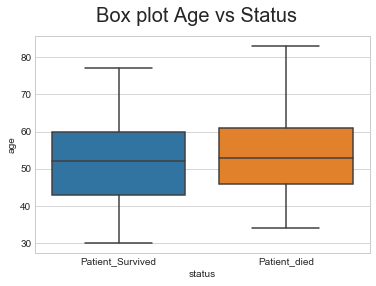

In [20]:
sns.boxplot(x='status',y='age', data=Haberman)
plt.suptitle('Box plot Age vs Status', fontsize=20)
plt.show()

Observations:
1. Patients who survived for than 5 years has age between 42 to 60 years
2. Patients who died within 5 year has age between 48 to 62 years
3. Patients whose age is less than 35 Survived and greater than 78 died.


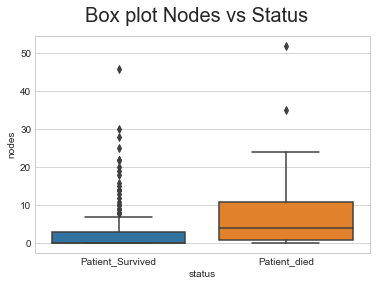

In [21]:
sns.boxplot(x='status',y='nodes', data=Haberman)
plt.suptitle('Box plot Nodes vs Status', fontsize=20)
plt.show()

Observations:
1. The lesser number of nodes higher the chance of survival

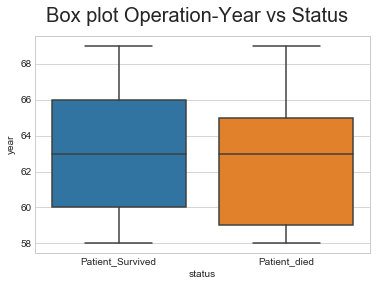

In [22]:
sns.boxplot(x='status',y='year', data=Haberman)
plt.suptitle('Box plot Operation-Year vs Status', fontsize=20)
plt.show()

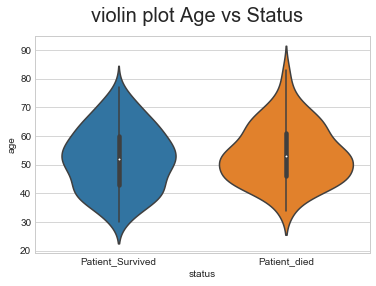

In [23]:
sns.violinplot(x='status',y='age', data=Haberman, size=7)
plt.suptitle('violin plot Age vs Status', fontsize=20)
plt.show()

Observation:
1. More number of patients survived have age between 42 to 60 years.
2. More number of patients died have age between 45 to 61 years.

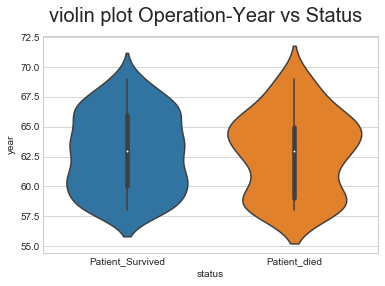

In [24]:
sns.violinplot(x='status',y='year', data=Haberman, size=7)
plt.suptitle('violin plot Operation-Year vs Status', fontsize=20)
plt.show()

Observation:
1. More number of patients survived have operation year between 1960 to 1966 .
2. More number of patients died have operation year between 1958 to 1965 .


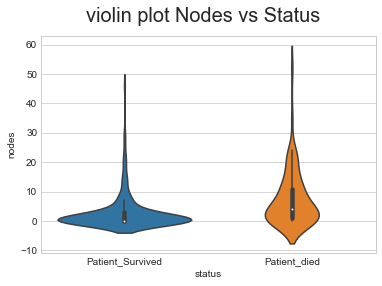

In [25]:
sns.violinplot(x='status',y='nodes', data=Haberman, size=7)
plt.suptitle('violin plot Nodes vs Status', fontsize=20)
plt.show()

Observation:
1. More number of patients survived have nodes between -4 to 0 .

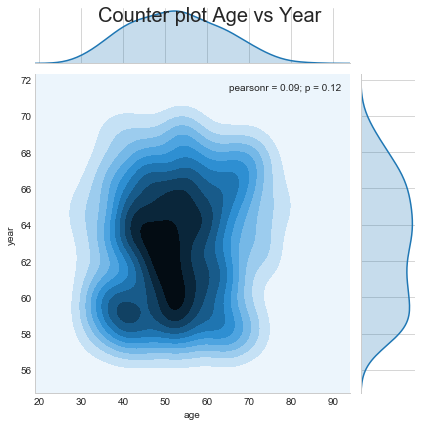

In [26]:
sns.jointplot(x="age", y="year", data=Haberman, kind="kde")
plt.suptitle('Counter plot Age vs Year', fontsize=20)
plt.show()

Observation:
1. There are more patients who have through operation during the year 1958 to 1965 and patients age between 42 to 58.

Conclusion:
1. There are 306 observations with 4 features in the dataset.
2. The Haberman dataset is imbalanced dataset as 225 patients belongs to class 1 status who survived more than 5 years after operation (nearly 74%) and 81 patients of class 2 status who died within 5 year of operation.
3. In Haberman dataset the patient whose undergo operation has age between 30 to 83 , Operation year is 1958 to 1969 and number of nodes is in between 0 to 52.
4. Univariate analysis PDFs: both age and Patient's Year of Operation are not good features for useful insights as the distribution is more similar for both people who survived and also dead.number of nodes is the only feature that is useful to know about the survival status of patients as there is difference between the distributions of both Classes.
5. Pair Plot analysis: Age versus nodes plot is only helpful to get the insight of data. With Pair plot, We cannot distinguish the data easily because most of them are overlapping.
6. Box plots:Patients who survived more than 5 years has age between 42 to 60 years,Patients who died within 5 year  has age between 48 to 62 years.
7. Contour Plot:There are more patients who have gone through operation during the year 1958 to 1965 and having age between 42 to 58.
8. The Patients who survived more than 5 years of operation had mean age 52 and who died within 5 years of operation had mean age 54 (From Statical analysis).
9. Violin Plots:More number of patients survived have nodes between -4 to 0 .
10. 90% of the patients who survived more than 5 years had number of nodes less than 8 and 50% of the patients who survived had number of nodes equal to 0.